In [1]:
import pandas as pd
import numpy as np

In [2]:
# define which room you want to look at
room_path = "./data/train_test_whole_class_1km/test/PUNKTSKY_1km_6210_518_RGBtrue_label.txt"
# define the corresponding prediction from our network
pred_path = "./pred/pointnet/PUNKTSKY_1km_6210_518_RGBtrue_label.txt"

In [3]:
# load data
room_data = pd.read_csv(room_path, sep=" ", header=None).values
pred_data = pd.read_csv(pred_path, sep=" ", header=None).values

In [4]:
# random sample of points (full set is too large for this naive approach)
idx = np.arange(len(room_data))
np.random.shuffle(idx)
idx = idx[:30000]

# quick plotting with matplotlib

In [4]:
import matplotlib.pyplot as plt

In [6]:
# max and min classes (to create comparable colormaps)
vmin = room_data[idx, -1].min()
vmax = room_data[idx, -1].max()

In [14]:
cm = plt.cm.get_cmap('RdYlBu')

## The given (true) segmentation

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


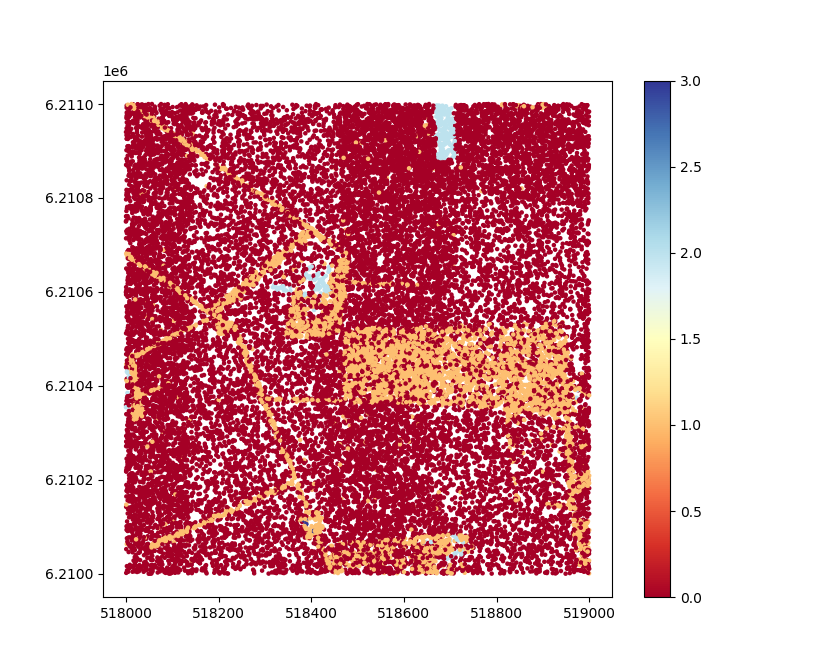

In [15]:
plt.figure()
sc = plt.scatter(
    room_data[idx, 0], room_data[idx, 1], c=room_data[idx, -1],
    cmap=cm, vmin=vmin, vmax=vmax, s=5,
)
plt.colorbar(sc)

## The predicted segmentation

<IPython.core.display.Javascript object>


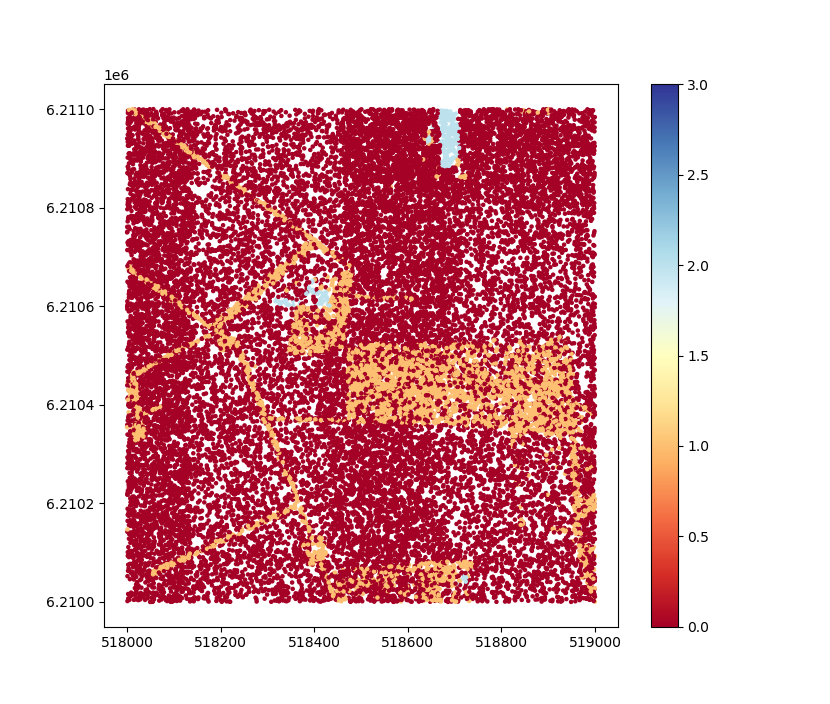

In [16]:
plt.figure()
plt.scatter(
    room_data[idx, 0], room_data[idx, 1], c=pred_data[idx, 0],
    cmap=cm, vmin=vmin, vmax=vmax, s=5,
)
plt.colorbar(sc)

# look a the 3d point clouds

In [5]:
from vispy import app, visuals, scene

In [4]:
norm_data = room_data.copy()
norm_data[:, 0] = (room_data[:, 0] - room_data[:, 0].min())/(room_data[:, 0].max() - room_data[:, 0].min()) -.5
norm_data[:, 1] = (room_data[:, 1] - room_data[:, 1].min())/(room_data[:, 1].max() - room_data[:, 1].min()) -.5
norm_data[:, 2] = (room_data[:, 2] - room_data[:, 2].min())/(room_data[:, 2].max() + 150 - room_data[:, 2].min()) #TODO +100 is a magic number to avoid odd looking scalings

In [6]:
Scatter3D = scene.visuals.create_visual_node(visuals.MarkersVisual)
canvas = scene.SceneCanvas(keys='interactive', show=True)
view = canvas.central_widget.add_view()
view.camera = 'turntable'
view.camera.fov = 45
view.camera.distance = 2
view.camera.po = 500

In [7]:
# original label
n_classes = len(np.unique(room_data[:, -1]))
colors = [(i/n_classes, 1.0-i/n_classes, 0, 0.8) for i in room_data[:, -1]]
p1 = Scatter3D(parent=view.scene)
p1.set_gl_state('translucent', blend=True, depth_test=True)
p1.set_data(norm_data[:, :3],  symbol='o', size=5, face_color=colors,
            edge_width=0.5, edge_color='blue')

In [25]:
# predicted label
n_classes = len(np.unique(room_data[:, -1]))
colors = [(i/n_classes, 1.0-i/n_classes, 0, 0.8) for i in pred_data[:, 0]]
p1 = Scatter3D(parent=view.scene)
p1.set_gl_state('translucent', blend=True, depth_test=True)
p1.set_data(norm_data[:, :3],  symbol='o', size=5, face_color=colors,
            edge_width=0.5, edge_color='blue')

In [8]:
canvas.show()

VispyWidget(height=600, width=800)